# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("marketing_campaign_dataset.csv")
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [4]:
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [5]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [6]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [7]:
df.shape

(200000, 16)

In [8]:
print("\nUnique values (categorical):")
print(df.select_dtypes(include='object').nunique())



Unique values (categorical):
Company                 5
Campaign_Type           5
Target_Audience         5
Duration                4
Channel_Used            6
Acquisition_Cost    15001
Location                5
Language                5
Customer_Segment        5
Date                  365
dtype: int64


In [10]:
# Clean and convert Acquisition_Cost to float
df["Acquisition_Cost"] = (
    df["Acquisition_Cost"]
    .astype(str)                          # make sure all entries are strings
    .str.replace(r"[^\d.]", "", regex=True)  # remove everything except digits and decimal
    .astype(float)                        # convert to float
)


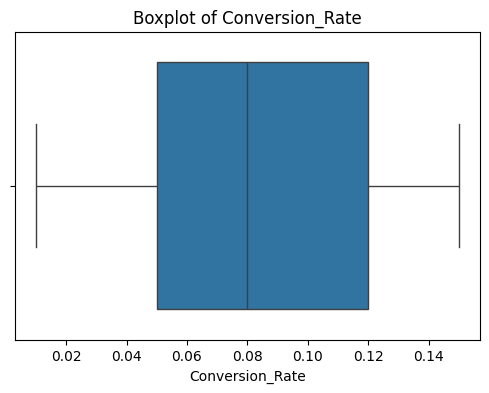

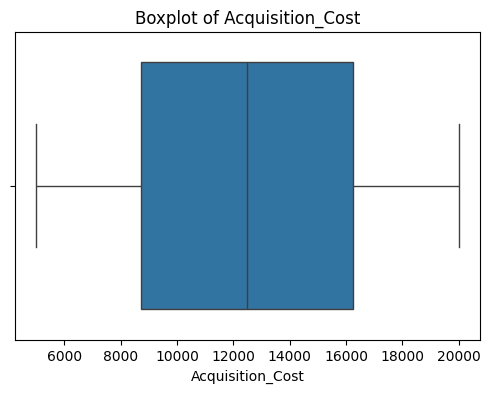

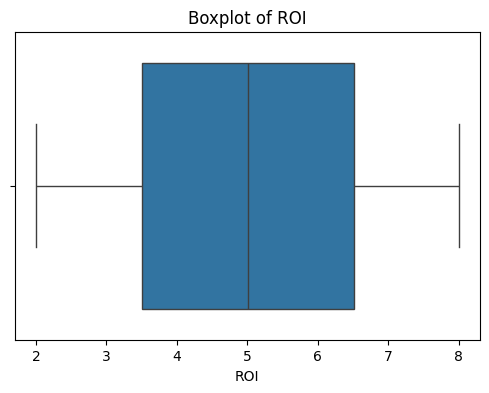

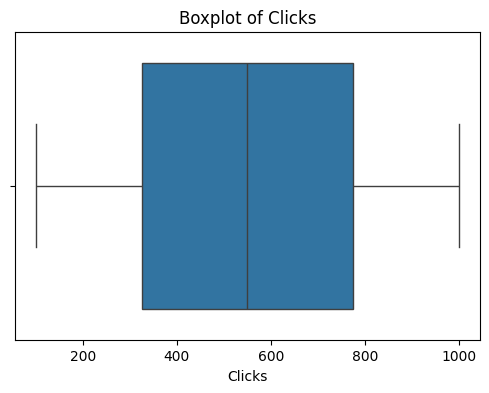

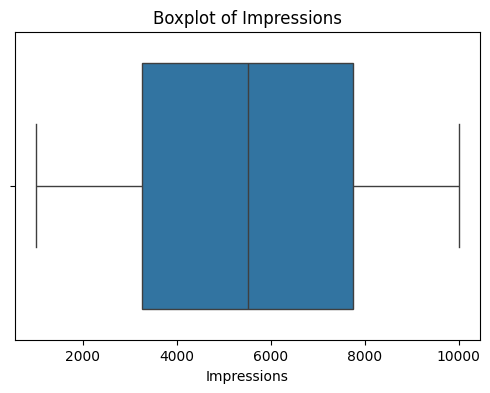

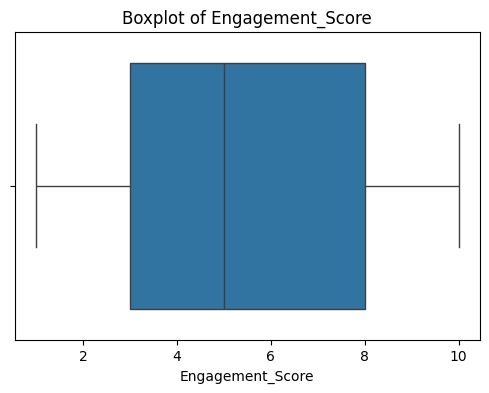

Outliers in Acquisition_Cost:
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


In [11]:
numeric_cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Calculate IQR for Acquisition_Cost
Q1 = df["Acquisition_Cost"].quantile(0.25)
Q3 = df["Acquisition_Cost"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Acquisition_Cost"] < (Q1 - 1.5 * IQR)) | (df["Acquisition_Cost"] > (Q3 + 1.5 * IQR))]
print("Outliers in Acquisition_Cost:")
print(outliers[["Campaign_ID", "Acquisition_Cost"]])


## Plot Campaign Performance Over Time

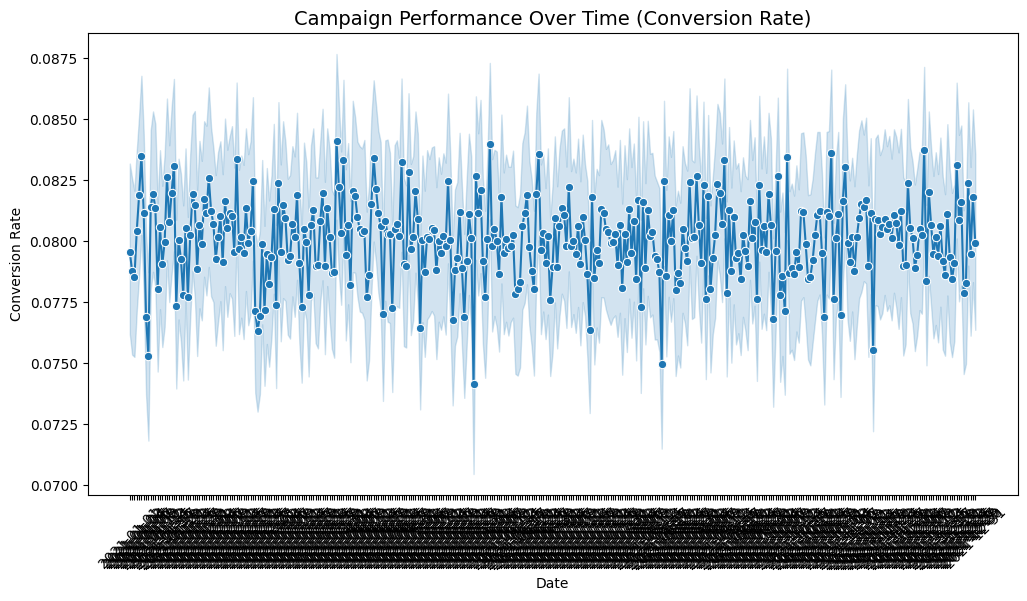

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Conversion_Rate", data=df, marker="o")
plt.title("Campaign Performance Over Time (Conversion Rate)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()


## Compare Conversion Rates Across Channels


C:\Users\Dell\AppData\Local\Temp\ipykernel_18492\3935650230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Channel_Used", y="Conversion_Rate", data=df, palette="Set2")


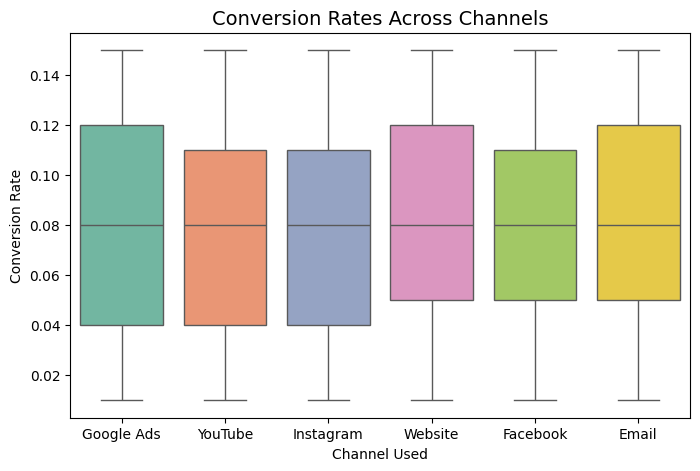

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Channel_Used", y="Conversion_Rate", data=df, palette="Set2")
plt.title("Conversion Rates Across Channels", fontsize=14)
plt.xlabel("Channel Used")
plt.ylabel("Conversion Rate")
plt.show()


## Across Regions(Location)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18492\535972761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Location", y="Conversion_Rate", data=df, estimator="mean", ci=None, palette="muted")
C:\Users\Dell\AppData\Local\Temp\ipykernel_18492\535972761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="Conversion_Rate", data=df, estimator="mean", ci=None, palette="muted")


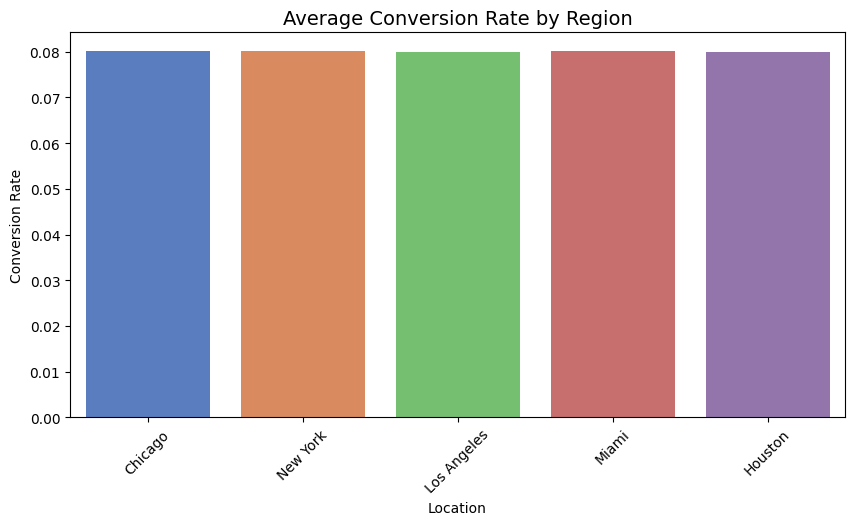

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x="Location", y="Conversion_Rate", data=df, estimator="mean", ci=None, palette="muted")
plt.title("Average Conversion Rate by Region", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Conversion Rate")
plt.show()


## Heatmap & Correlation Plot

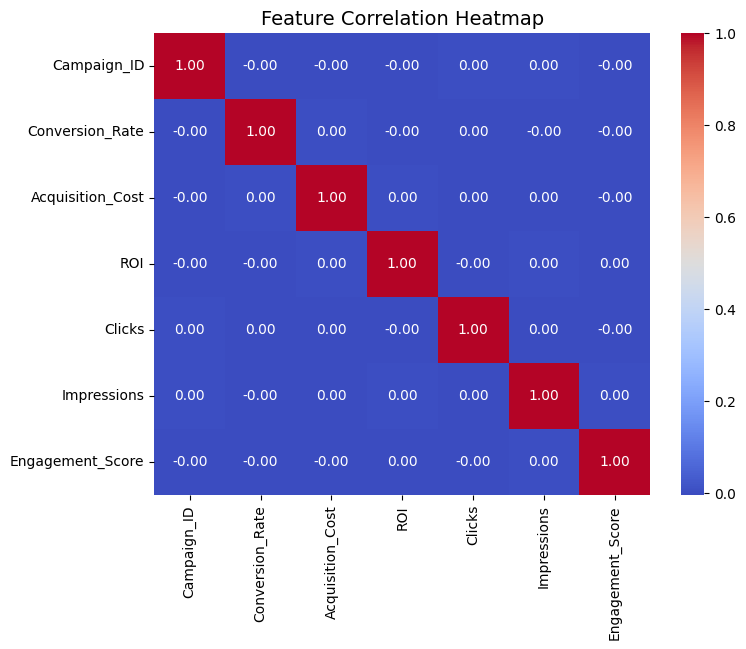

In [15]:
# Correlation for numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


## Top & Underperforming Campaigns (based on ROI or Engagement_Score)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18492\3420313310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Campaign_ID", y="ROI", data=top_campaigns, palette="Greens")


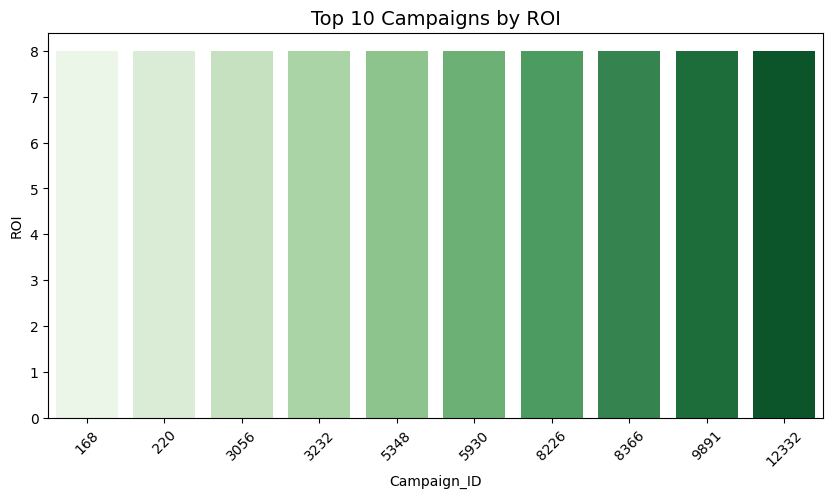

C:\Users\Dell\AppData\Local\Temp\ipykernel_18492\3420313310.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Campaign_ID", y="ROI", data=bottom_campaigns, palette="Reds")


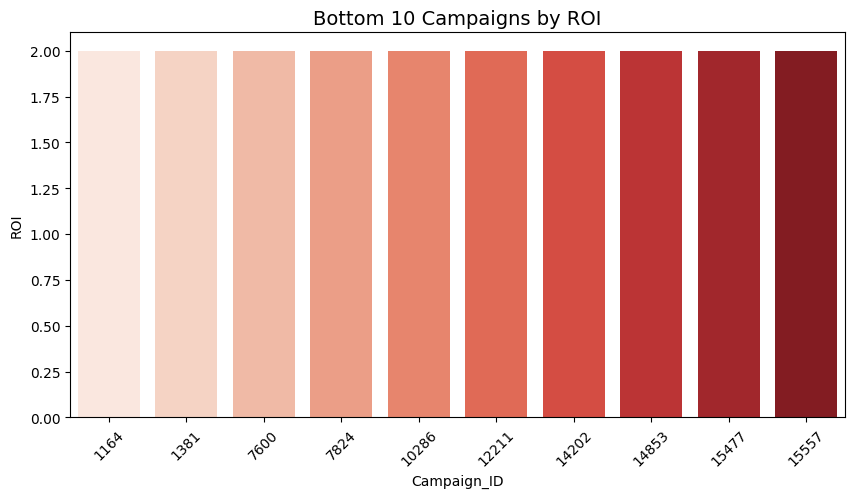

In [16]:
# Top 10 campaigns by ROI
top_campaigns = df.nlargest(10, "ROI")
plt.figure(figsize=(10,5))
sns.barplot(x="Campaign_ID", y="ROI", data=top_campaigns, palette="Greens")
plt.title("Top 10 Campaigns by ROI", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Bottom 10 campaigns by ROI
bottom_campaigns = df.nsmallest(10, "ROI")
plt.figure(figsize=(10,5))
sns.barplot(x="Campaign_ID", y="ROI", data=bottom_campaigns, palette="Reds")
plt.title("Bottom 10 Campaigns by ROI", fontsize=14)
plt.xticks(rotation=45)
plt.show()
